# **Task 2: Predict Future Stock Prices**

In [14]:
# Import Libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [27]:
# Fetching historical stock data for Apple (TSLA)

ticker = "TSLA"
df = yf.download(ticker, start="2024-01-01", end="2025-01-01")

df.head()

/tmp/ipython-input-2933624207.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2024-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [28]:
# Shifting 'Close' column to create the target (next day's close)
df["Target"] = df["Close"].shift(-1)

In [29]:
df.head()

Price,Close,High,Low,Open,Volume,Target
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,238.449997
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,237.929993
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,237.490005
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900,240.449997
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,234.960007


In [32]:
# Droping the last row as it will have NaN value in 'Close_shifted'
df.drop(df.index[-1], inplace=True)

In [34]:
df.isnull().sum()

,,0
Price,Ticker,
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0
Target,,0


In [35]:
# Selecting features and target
features = ["Open", "High", "Low", "Volume"]
X = df[features]
y = df["Target"]

In [37]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [38]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [39]:
# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(f"Linear Regression RMSE: {lr_rmse:.4f}")

Linear Regression RMSE: 18.5491


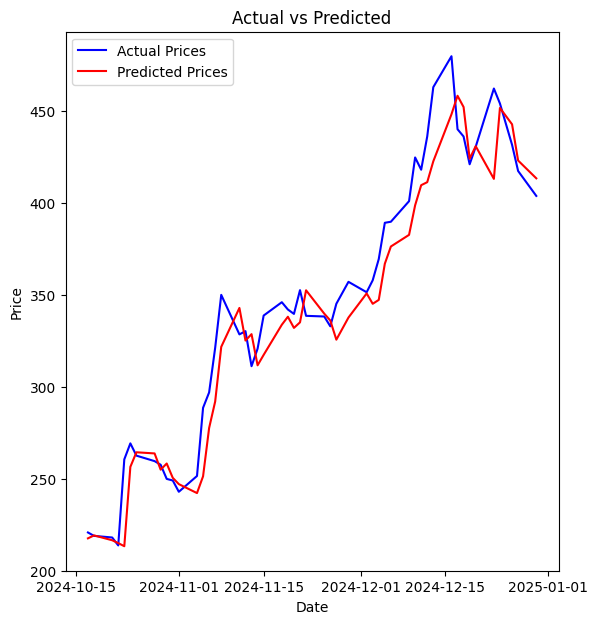

In [45]:
# Ploting actual vs predicted closing prices
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, lr_preds, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()